  <h2 style="text-align: center">Data601</h2>
  <h2 style="text-align: center">Baltimore Crime Data Exploratory Data Analysis</h2>

<h4>About Data</h4>
[Baltimore City Crime Data](https://data.baltimorecity.gov/datasets/baltimore::part1-crime-data/about)
<p>https://data.baltimorecity.gov/datasets/baltimore::part1-crime-data/about<p>
<li>This dataset represents the location and characteristics of major (Part 1) crime against persons such as homicide, shooting, robbery, aggravated assault etc. occurring within the City of Baltimore. The data is updated on Friday evening on a weekly basis.</li>

<h4 style="text-align:center">Columns and Datatypes in crime data</h4>


| Column | Datatype| Description |
|-----------| ----------- |----------|
| CrimeDateTime | Date and Time | Date of the incident and time of the incident |
| CrimeCode | Text | Each crime is given a Crime Code |
| Location | Text |Address where incident occurred |
| Description | Text |Name of the incident example: burglary, Murder, Assault |
| Inside_Outside | Text | Whether incident happened indoor or outdoor inside: indoor, outside: outdoor |
| Weapon | Text | Weapon used while committing crime |
| Post | Text | last 3 digits of postal code (I Guess) |
| District | Text | District where incident happened |
| Neighborhood | Text | Place or locality Where incident happened |
| Latitude | Number | Latitude of the crime incident |
|Longitude|Number| Logitude of the Crime incident|
|GeoLocation|Text| GeoLocation of the crime incident(combination of latitude and logitude) |
| Premise | Text | premises of the incident example: Street, House |
|VRIName|Text| NA |
|Total_Incidents|Number| Total number of incidents |

<h5>Python Kernel version</h5>

In [1]:
!Python --version

Python 3.9.7


<h5>Imports</h5>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h5>Load data into pandas</h5>

In [3]:
crime_data_raw_df = pd.read_csv("Part1_Crime_data.Csv" , low_memory=False)

In [4]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
# To ignore A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
pd.options.mode.chained_assignment = None

In [5]:
crime_data_raw_df.shape

(513756, 19)

<h5>Observation:</h5>
<li>Data shape is rectangular.</li>

In [6]:
crime_data_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513756 entries, 0 to 513755
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                512860 non-null  float64
 1   Y                512860 non-null  float64
 2   RowID            513756 non-null  int64  
 3   CrimeDateTime    513756 non-null  object 
 4   CrimeCode        513756 non-null  object 
 5   Location         511207 non-null  object 
 6   Description      513756 non-null  object 
 7   Inside_Outside   443805 non-null  object 
 8   Weapon           105261 non-null  object 
 9   Post             512012 non-null  object 
 10  District         512012 non-null  object 
 11  Neighborhood     511981 non-null  object 
 12  Latitude         512860 non-null  float64
 13  Longitude        512860 non-null  float64
 14  GeoLocation      513756 non-null  object 
 15  Premise          443469 non-null  object 
 16  VRIName          60053 non-null   obje

<h5>count null values in each column</h5>

In [7]:
crime_data_raw_df.isnull().sum(axis = 0)

X                     896
Y                     896
RowID                   0
CrimeDateTime           0
CrimeCode               0
Location             2549
Description             0
Inside_Outside      69951
Weapon             408495
Post                 1744
District             1744
Neighborhood         1775
Latitude              896
Longitude             896
GeoLocation             0
Premise             70287
VRIName            453703
Total_Incidents         0
Shape              513756
dtype: int64

In [8]:
crime_data_raw_df[crime_data_raw_df['Total_Incidents']>1].count()

X                  0
Y                  0
RowID              0
CrimeDateTime      0
CrimeCode          0
Location           0
Description        0
Inside_Outside     0
Weapon             0
Post               0
District           0
Neighborhood       0
Latitude           0
Longitude          0
GeoLocation        0
Premise            0
VRIName            0
Total_Incidents    0
Shape              0
dtype: int64

<h5>Observation</h5>
<li>VRIName Column has almost more than 450K null values</li>
<li>Weapon Column has almost 400K Null values</li>
<li>Inside_Outside Column has almost 70K null values</li>
<li>Premise column has 70K null values</li>
<li>Total_Incidents column has just 1 in the entire data</li>

<h5>Extraction</h5>

In [9]:
extracted_crime_data = crime_data_raw_df[['CrimeDateTime','CrimeCode','Location','Description','Inside_Outside','Weapon','Post','District','Neighborhood','Premise', ]]

<li>Extracting CrimeDate, CrimeCode, Location, Description, Inside_Outside, Weapon, Post, District, Neighborhood, Premise from crime raw dataframe</li>
<li>skipped X, Y, latitude, logitude, geolocation, VRIName, Total_Incidents</li>
<li>Skipped Total_Incidents because it has only 1 value i.e 1</li>
<li>Not using latitude, logitude, geolocation, vriname for visualizations</li>

<h3 style="text-align:center">Data Cleaning</h3>

In [10]:
extracted_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513756 entries, 0 to 513755
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CrimeDateTime   513756 non-null  object
 1   CrimeCode       513756 non-null  object
 2   Location        511207 non-null  object
 3   Description     513756 non-null  object
 4   Inside_Outside  443805 non-null  object
 5   Weapon          105261 non-null  object
 6   Post            512012 non-null  object
 7   District        512012 non-null  object
 8   Neighborhood    511981 non-null  object
 9   Premise         443469 non-null  object
dtypes: object(10)
memory usage: 39.2+ MB


In [11]:
extracted_crime_data.describe(include='all')

,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Premise
count,513756,513756,511207,513756,443805,105261,512012,512012,511981,443469
unique,337989,85,24172,14,4,5,127,9,278,128
top,2016/06/05 02:38:00+00,4E,1500 RUSSELL ST,LARCENY,I,FIREARM,114,NORTHEAST,DOWNTOWN,STREET
freq,129,91822,1094,113528,217488,46217,9692,77030,17818,166381


In [12]:
extracted_crime_data.Description.unique()

array(['ROBBERY - STREET', 'ROBBERY - COMMERCIAL', 'LARCENY',
       'AGG. ASSAULT', 'COMMON ASSAULT', 'LARCENY FROM AUTO', 'SHOOTING',
       'BURGLARY', 'AUTO THEFT', 'ROBBERY - RESIDENCE', 'HOMICIDE',
       'RAPE', 'ROBBERY - CARJACKING', 'ARSON'], dtype=object)

In [13]:
first_n_entries=5
for col,col_type in extracted_crime_data.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',extracted_crime_data[col].nunique(),'unique entries; first ',first_n_entries,'are')
        print(extracted_crime_data[col][0:first_n_entries])


 CrimeDateTime has 337989 unique entries; first  5 are
0    2022/03/05 03:43:00+00
1    2022/03/05 03:43:00+00
2    2022/03/05 03:43:00+00
3    2022/03/05 04:30:00+00
4    2022/03/05 01:30:00+00
Name: CrimeDateTime, dtype: object

 CrimeCode has 85 unique entries; first  5 are
0    3NF
1    3NF
2    3NF
3    3CF
4    3AF
Name: CrimeCode, dtype: object

 Location has 24172 unique entries; first  5 are
0         1800 FLEET ST
1         1800 FLEET ST
2         1800 FLEET ST
3    100 E PATAPSCO AVE
4         RD & KEVIN RD
Name: Location, dtype: object

 Description has 14 unique entries; first  5 are
0        ROBBERY - STREET
1        ROBBERY - STREET
2        ROBBERY - STREET
3    ROBBERY - COMMERCIAL
4        ROBBERY - STREET
Name: Description, dtype: object

 Inside_Outside has 4 unique entries; first  5 are
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Inside_Outside, dtype: object

 Weapon has 5 unique entries; first  5 are
0    FIREARM
1    FIREARM
2    FIREARM
3    FIREARM
4  

In [14]:
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))
uniq_per_col(extracted_crime_data,5)


====  CrimeDateTime has 337989 unique entries ====
2016/06/05 02:38:00+00    129
2018/12/20 04:00:00+00     77
2013/12/25 02:00:00+00     59
2015/04/27 15:30:00+00     44
2011/06/16 18:00:00+00     43
Name: CrimeDateTime, dtype: int64

====  CrimeCode has 85 unique entries ====
4E    91822
6D    68508
5A    43956
7A    40308
6J    27670
Name: CrimeCode, dtype: int64

====  Location has 24172 unique entries ====
1500 RUSSELL ST             1094
200 E PRATT ST              1067
2400 FREDERICK AVE          1038
2400 LIBERTY HEIGHTS AVE     907
6300 EASTERN AVE             869
Name: Location, dtype: int64

====  Description has 14 unique entries ====
LARCENY              113528
COMMON ASSAULT        91822
BURGLARY              73957
LARCENY FROM AUTO     68508
AGG. ASSAULT          57418
Name: Description, dtype: int64

====  Inside_Outside has 4 unique entries ====
I          217488
O          213193
Outside     10578
Inside       2546
Name: Inside_Outside, dtype: int64

====  Weapon has

<h5>Observation</h5>
<li>It is observed that Inside_Outside column has I, O instead of Inside and Outside</li>

In [15]:
extracted_crime_data['Inside_Outside'] = extracted_crime_data['Inside_Outside'].replace(['I','O'],['Inside','Outside'])
extracted_crime_data["CrimeDateTime"] = pd.to_datetime(extracted_crime_data['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S', errors = 'coerce', utc=True)

<li>Replaced I, O values in Inside_Outside column with "Inside" and "Outside respectively"</li>
<li>Converting string datetime format to pandas datatime format</li>

In [16]:
extracted_crime_data.Weapon.unique()

array(['FIREARM', nan, 'KNIFE', 'OTHER', 'HANDS', 'FIRE'], dtype=object)

In [17]:
extracted_crime_data['Weapon'] = extracted_crime_data['Weapon'].replace('nan','Unknown')
extracted_crime_data['Weapon'] = extracted_crime_data['Weapon'].fillna('Unknown')
extracted_crime_data['Weapon'] = extracted_crime_data['Weapon'].replace(['Unknown','OTHER'],'Unknown')

<li>Replacing Nan with Unknown in weapon column</li>
<li>Replacing other with Unknown</li>

In [18]:
extracted_crime_data.Weapon.unique()

array(['FIREARM', 'Unknown', 'KNIFE', 'HANDS', 'FIRE'], dtype=object)

In [19]:
extracted_crime_data.District.unique()

array(['SOUTHEAST', 'SOUTHERN', 'SOUTHWEST', 'WESTERN', 'CENTRAL',
       'EASTERN', 'NORTHERN', 'NORTHEAST', 'NORTHWEST', nan], dtype=object)

In [20]:
extracted_crime_data['District'] = extracted_crime_data['District'].fillna('Unknown')

<li>Filling all nan values with values with Unknown</li>
<li>As almost all columns are categorical data. Filling Nan values instead of dropping them</li>

In [21]:
# extracted_crime_data.fillna('Unknown',inplace =True)
extracted_crime_data[['CrimeCode', 'Location', 'Description', 'Inside_Outside', 'Weapon', 'Post', 'Neighborhood', 'Premise']] = extracted_crime_data[['CrimeCode', 'Location', 'Description', 'Inside_Outside', 'Weapon', 'Post', 'Neighborhood', 'Premise']].fillna(value='Unknown')

<h3 style="text-align:center">Sanity Checks</h3>

In [22]:
extracted_crime_data.Weapon.value_counts()

Unknown    438788
FIREARM     46217
KNIFE       19181
HANDS        7222
FIRE         2348
Name: Weapon, dtype: int64

In [23]:
extracted_crime_data.Description.value_counts()

LARCENY                 113528
COMMON ASSAULT           91822
BURGLARY                 73957
LARCENY FROM AUTO        68508
AGG. ASSAULT             57418
AUTO THEFT               43325
ROBBERY - STREET         32665
ROBBERY - COMMERCIAL      8278
ROBBERY - RESIDENCE       5704
SHOOTING                  5452
ROBBERY - CARJACKING      4171
RAPE                      3527
HOMICIDE                  3053
ARSON                     2348
Name: Description, dtype: int64

In [24]:
extracted_crime_data.Inside_Outside.value_counts()

Outside    223771
Inside     220034
Unknown     69951
Name: Inside_Outside, dtype: int64

In [25]:
extracted_crime_data.District.value_counts()

NORTHEAST    77030
SOUTHEAST    71371
CENTRAL      60644
SOUTHERN     58287
NORTHERN     56443
SOUTHWEST    51366
NORTHWEST    51169
EASTERN      44512
WESTERN      41190
Unknown       1744
Name: District, dtype: int64

In [26]:
extracted_crime_data.Location.value_counts()

Unknown                     2549
1500 RUSSELL ST             1094
200 E PRATT ST              1067
2400 FREDERICK AVE          1038
2400 LIBERTY HEIGHTS AVE     907
                            ... 
3800 BALTIMORE Street          1
ST & WARD ST                   1
400 25TH ST                    1
400 JASPER Street              1
4100 WINDSOR MILL RD           1
Name: Location, Length: 24173, dtype: int64

In [27]:
extracted_crime_data.District.value_counts()

NORTHEAST    77030
SOUTHEAST    71371
CENTRAL      60644
SOUTHERN     58287
NORTHERN     56443
SOUTHWEST    51366
NORTHWEST    51169
EASTERN      44512
WESTERN      41190
Unknown       1744
Name: District, dtype: int64

In [28]:
extracted_crime_data

,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Premise
0,2022-03-05 03:43:00+00:00,3NF,1800 FLEET ST,ROBBERY - STREET,Unknown,FIREARM,213,SOUTHEAST,FELLS POINT,Unknown
1,2022-03-05 03:43:00+00:00,3NF,1800 FLEET ST,ROBBERY - STREET,Unknown,FIREARM,213,SOUTHEAST,FELLS POINT,Unknown
2,2022-03-05 03:43:00+00:00,3NF,1800 FLEET ST,ROBBERY - STREET,Unknown,FIREARM,213,SOUTHEAST,FELLS POINT,Unknown
3,2022-03-05 04:30:00+00:00,3CF,100 E PATAPSCO AVE,ROBBERY - COMMERCIAL,Unknown,FIREARM,913,SOUTHERN,BROOKLYN,Unknown
4,2022-03-05 01:30:00+00:00,3AF,RD & KEVIN RD,ROBBERY - STREET,Unknown,FIREARM,822,SOUTHWEST,ROGNEL HEIGHTS,Unknown
...,...,...,...,...,...,...,...,...,...,...
513751,1963-10-30 00:00:00+00:00,2A,3100 FERNDALE AVE,RAPE,Inside,Unknown,622,NORTHWEST,HOWARD PARK,ROW/TOWNHOUSE-OCC
513752,1921-09-25 14:15:00+00:00,7C,200 W MONUMENT ST,AUTO THEFT,Inside,Unknown,124,CENTRAL,MOUNT VERNON,SHED/GARAGE
513753,1821-06-18 12:56:02+00:00,6G,5500 PURDUE AVE,LARCENY,Unknown,Unknown,414,NORTHEAST,WOODBOURNE HEIGHTS,Unknown
513754,NaT,5A,1700 DUNDALK AVE,BURGLARY,Outside,Unknown,234,SOUTHEAST,GRACELAND PARK,OTHER/RESIDENTIAL


<h3 style="text-align:center">Visualizations</h3>

Text(0.5, 1.0, 'Weapons used in crime without Unknown category')

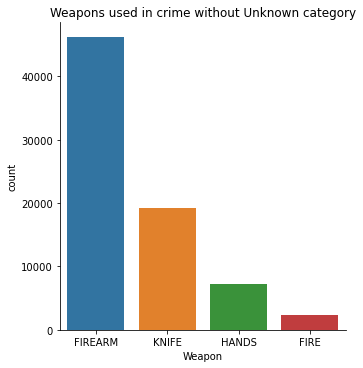

In [29]:
plot = sns.catplot(data=extracted_crime_data, kind = 'count',x = 'Weapon',order = ['FIREARM','KNIFE','HANDS','FIRE'])
plot.ax.set_title('Weapons used in crime without Unknown category')

Text(0.5, 1.0, 'Weapons used in crime including Unknown category')

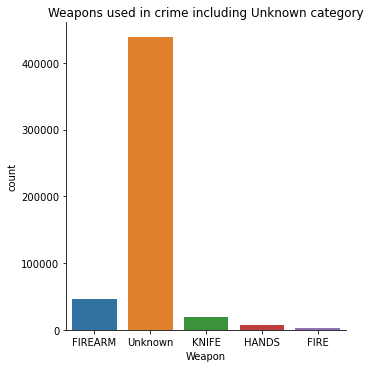

In [30]:
plot = sns.catplot(data=extracted_crime_data, x='Weapon', kind = 'count')
plot.ax.set_title('Weapons used in crime including Unknown category')

<h5>Observation</h5>
<li>Weapons used in most crimes are unknown</li>
<li>If we ignore unknown category, Firearms are most used in crimes</li>

Text(0.5, 1.0, 'Heat Map showing District wise crime rate')

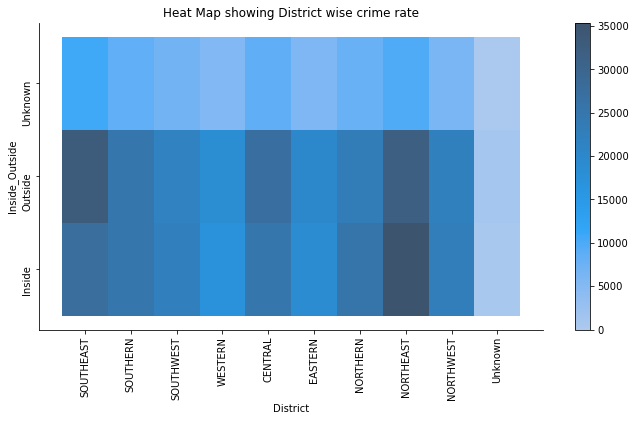

In [31]:
plot = sns.displot(extracted_crime_data, x="District", y="Inside_Outside", cbar = True, aspect=2)
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('Heat Map showing District wise crime rate')

Text(0.5, 1.0, 'Different Crime Counts Inside_Outside')

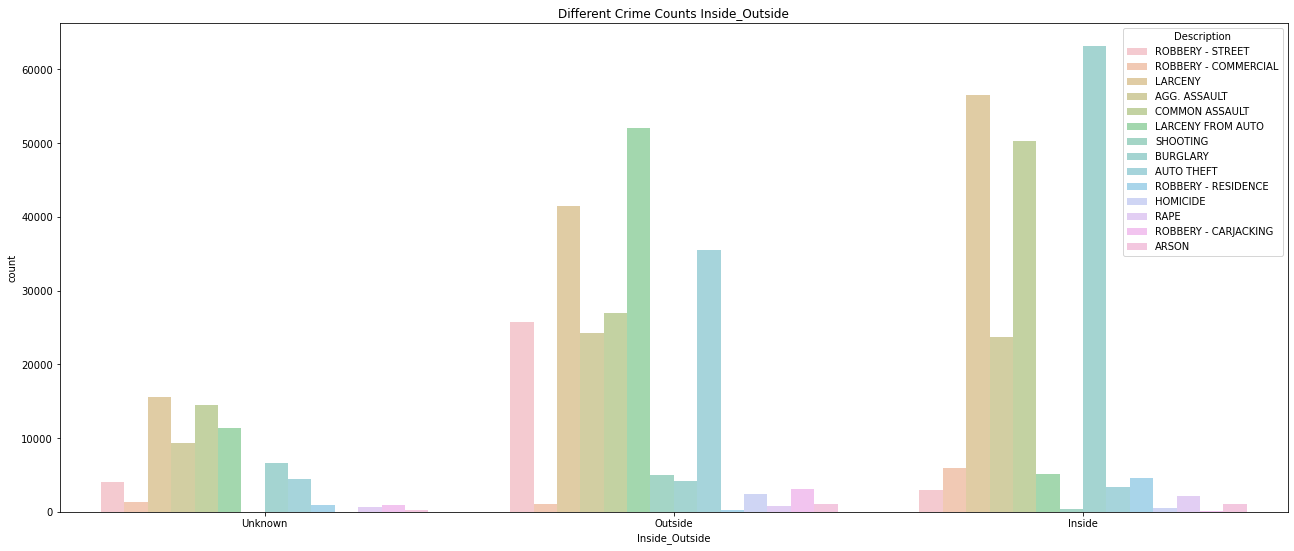

In [32]:
plot = sns.countplot(x ='Inside_Outside', data = extracted_crime_data, hue = "Description", alpha=0.5)
plt.gcf().set_size_inches(22, 9)
plot.set_title('Different Crime Counts Inside_Outside')

Text(0.5, 1.0, 'Different Crime Counts Inside_Outside')

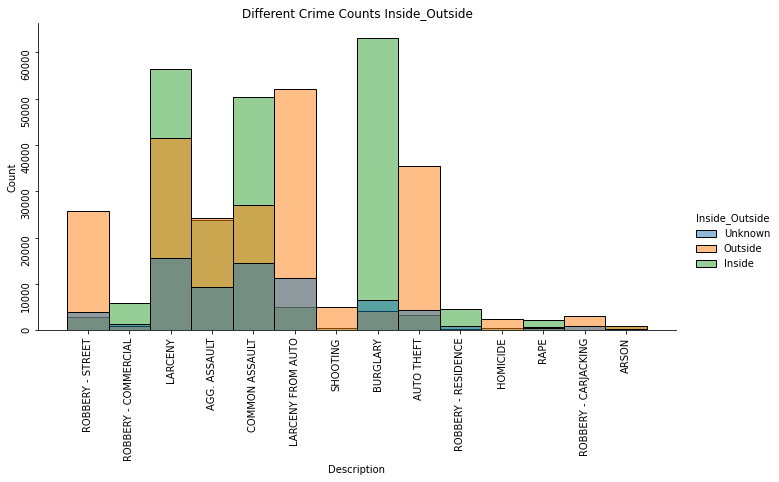

In [33]:
plot = sns.displot(extracted_crime_data, x='Description' ,kind='hist' ,hue = 'Inside_Outside', aspect=2)
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('Different Crime Counts Inside_Outside')

<h5>Plotting Crime Hourly for entire Data</h5>

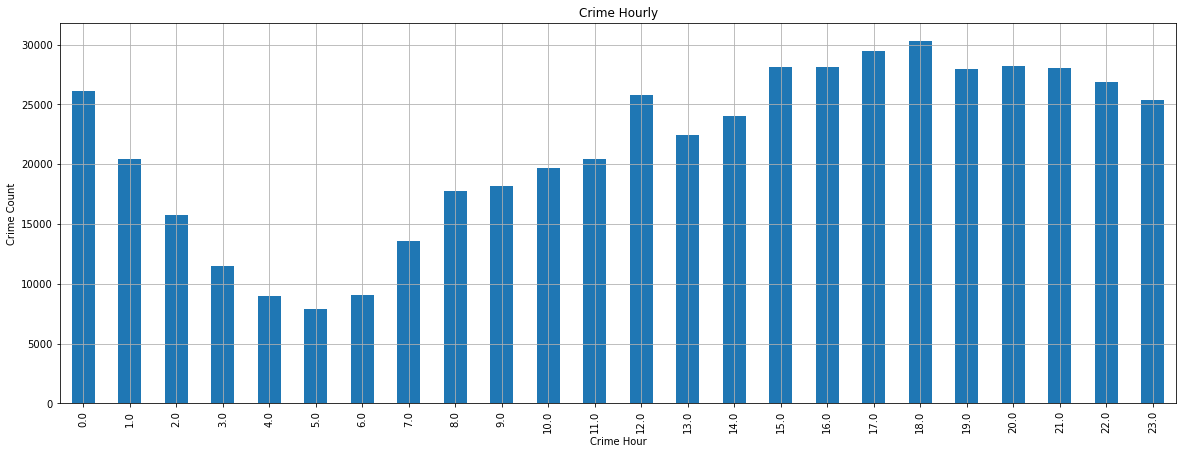

In [34]:
# extracted_crime_data[extracted_crime_data['CrimeDateTime']=="Unknown"]
times = pd.to_datetime(extracted_crime_data.CrimeDateTime)
crime_hourly=extracted_crime_data.groupby([times.dt.hour]).CrimeDateTime.count();
plt.figure(figsize = (20, 7))
crime_hourly.plot.bar(xlabel="Crime Hour", ylabel="Crime Count", title="Crime Hourly", grid=True)
plt.show()

<ol>
    <li>Crime is lowest in the morning between 4 am to 6 am</li>
    <li>Rate is gradually increasing as the day progresses</li>
    <li>Crime rate peaks at 6pm in the evening</li>
</ol>

<h5>Plotting crime monthly</h5>

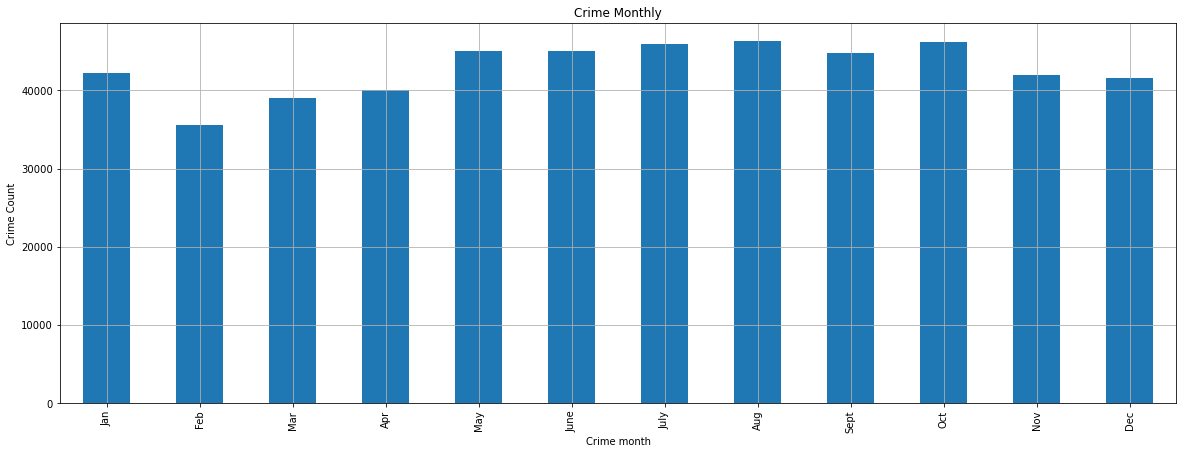

In [35]:
times = pd.to_datetime(extracted_crime_data.CrimeDateTime)
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
crime_monthly=extracted_crime_data.groupby([times.dt.month]).CrimeDateTime.count();
plt.figure(figsize = (20, 7))
ax=crime_monthly.plot.bar(xlabel="Crime month", ylabel="Crime Count", title="Crime Monthly", grid=True)
ax.set_xticklabels(month)
plt.show()

<ol>
    <li>Crime rate is lowest in the month of February.</li>
    <li>Crime rate is comparitively high from May to October.</li>
</ol>

<h5>Plotting Crime year wise</h5>

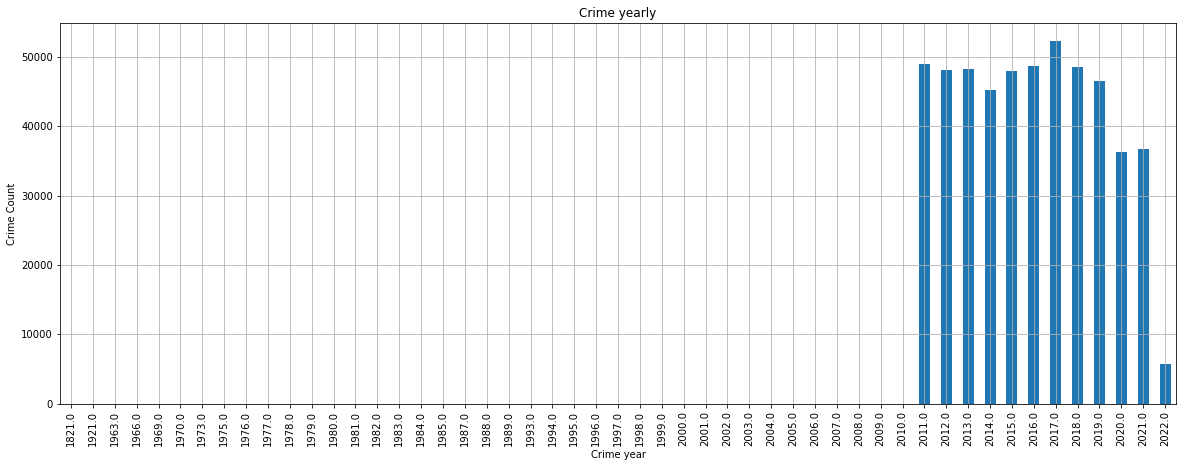

In [36]:
times = pd.to_datetime(extracted_crime_data.CrimeDateTime)
crime_yearly=extracted_crime_data.groupby([times.dt.year]).CrimeDateTime.count();
plt.figure(figsize = (20, 7))
crime_yearly.plot.bar(xlabel="Crime year", ylabel="Crime Count", title="Crime yearly", grid=True)
plt.show()
# crime_yearly[crime_yearly<100]

<ol>
    <li>Crime rate isn't properly recorded before 2011</li>
    <li>Highest Crime rate is recorded in the year 2017</li>
</ol>

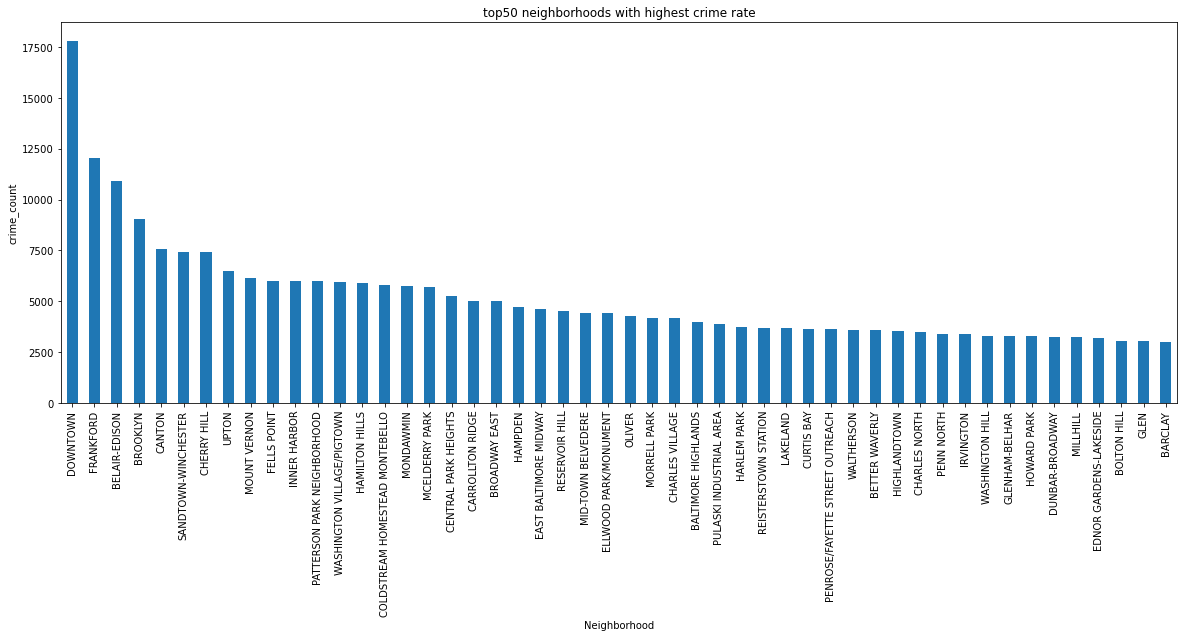

In [37]:
plt.figure(figsize = (20, 7))
extracted_crime_data.groupby('Neighborhood').Neighborhood.count().sort_values(ascending=False).head(50)\
.plot.bar(ylabel='crime_count', title="top50 neighborhoods with highest crime rate")
plt.show()

<ol>
    <li>Downtown has the highest crime rate with over 17500 reported incidents till date</li>
</ol>

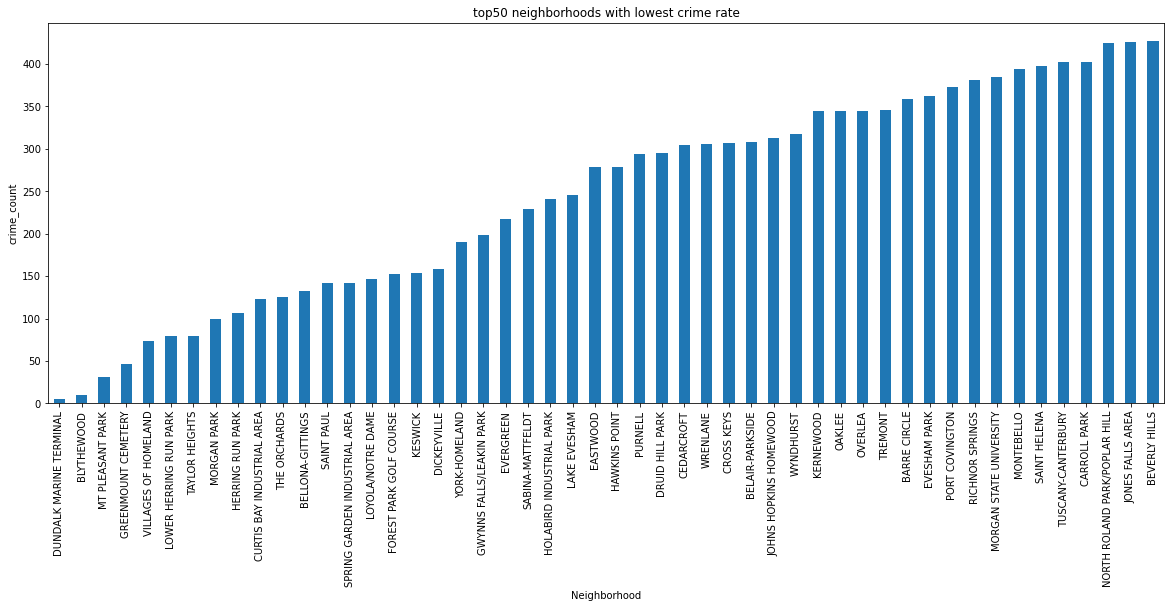

In [38]:
plt.figure(figsize = (20, 7))
extracted_crime_data.groupby('Neighborhood').Neighborhood.count().sort_values(ascending=True).head(50)\
.plot.bar(ylabel='crime_count', title="top50 neighborhoods with lowest crime rate")
plt.show()

<h5>Observations</h5>
<li>Dundalk Marine Terminal has lowest crime recorded</li>
<li>Crimes reported in Dundalk Marine Terminal, Blythewood, MT Pleasant Park , Green Mount are less than 50</li>

Text(0.5, 1.0, 'Weapon used in differnent crimes excluding Unknown category')

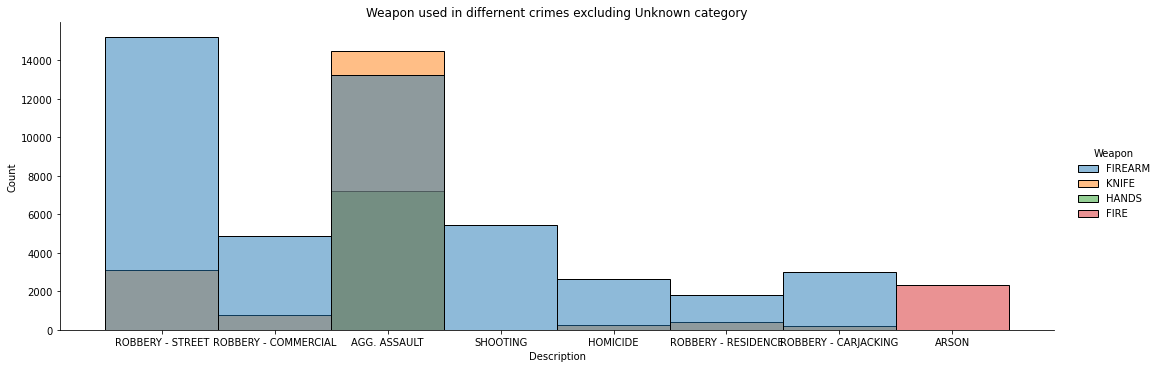

In [39]:
weapon_vs_crime_df = extracted_crime_data[extracted_crime_data['Weapon']!='Unknown']
plot = sns.displot(weapon_vs_crime_df, x='Description' ,kind='hist' ,hue = 'Weapon', aspect=3)
plot.ax.set_title('Weapon used in differnent crimes excluding Unknown category')

<li>fire arm is most used in all the crimes except arson</li>

<h3>Data Inconsistencies Observed</h3>

<ol>
    <li>VRIName Column has almost 85 Percent null values</li>
    <li>Weapon used in the most of the crimes is unknown</li>
    <li>Crime data was not recorded regularly or properly before 2011</li>
    <li>2 dates were in dataset which pandas couldn't handle</li>
</ol>

<h3>Summary</h3>

<ul>
    <li>Firearm is the most used weapon if we exclude unknown category.</li>
    <li>In Most of the crimes weapon used is not recorded.</li>
    <li>NorthEast district has highest inside and outside crime.</li>
    <li>South east district has highest crime outside.</li>
    <li>Crime rate is lowest between morning 4am to 6am on an average.</li>
    <li>Crime rate is gradually increasing as the day progresses.</li>
    <li>Crime rate peaked at 6pm in the evening on an average(unexpected I thought it would peak at post 11pm or midnight.</li>
    <li>Months of november and december has lowest crime on an average throughout the year.</li>
    <li>I want to conclude that crime rate is low in winter but there was a rise in crime rate during January and dip during February.</li>
    <li>Year 2017 has the highest crime rate recorded</li>
    <li>Downtown has highest crime rate recorded.</li>
    <li>Dundalk Marine Terminal has lowest crime recorded.</li>
    <li>Gap between highest and lowest crime rate recorded is huge.</li>
</ul>

<h3>Things learnt:</h3>
<ul>
    <li>Where to get data from? Is it legal to use dataset found for analysis-->(still learning...)</li>
    <li>How to find dataset. Looking up for datasets on internet(still learning...)</li>
    <li>How to open huge data without pandas</li>
    <li>Limitations of pandas. When to use pandas and when we shouldn't use pandas</li>
    <li>understanding dataset by using pandas and python</li>
    <li>Cleaning data using pandas and python</li>
    <li>Formatting data into required format</li>
    <li>Type converting to appropriate data before plotting(part of cleaning)</li>
    <li>Never trust the data</li>
    <li>Even when the data is clean we have make sure the data is clean by sampling and sanity checks</li>
    <li>Visualizing data and interpreting data</li>
    <li>Data can be interpreted easily using visualizations</li>
    <li>Pandas can only handle dates that range from 1600 to </li>
</ul>